# Assume alpha(r) = alpha0 / (1+Br**2/Beq**2) and obtain saturated solutions (1D in r)

# Plot with respect to the radial distance

 36%|███▌      | 3560/10001 [00:01<00:03, 1954.08it/s]C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_3004\741611897.py:28: RuntimeWarning: overflow encountered in square
  omega = omega0/(1+(R/r_omega)**2)**0.5
C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_3004\741611897.py:31: RuntimeWarning: overflow encountered in square
  alpha = alpha_0/(1+(Br/B_eq)**2)
C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_3004\741611897.py:32: RuntimeWarning: overflow encountered in multiply
  return eta_t*(np.gradient((1/R)*np.gradient(R*Br, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) -(2*alpha*Bphi/np.pi)
C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_3004\741611897.py:32: RuntimeWarning: invalid value encountered in multiply
  return eta_t*(np.gradient((1/R)*np.gradient(R*Br, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) -(2*alpha*Bphi/np.pi)
C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_3004\741611897.py:37: RuntimeWarning: overflow encountered in square
  omega = omega0/(1

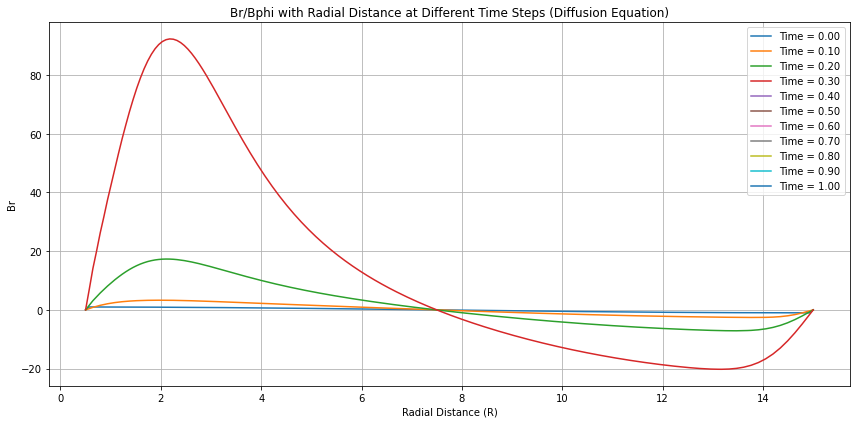

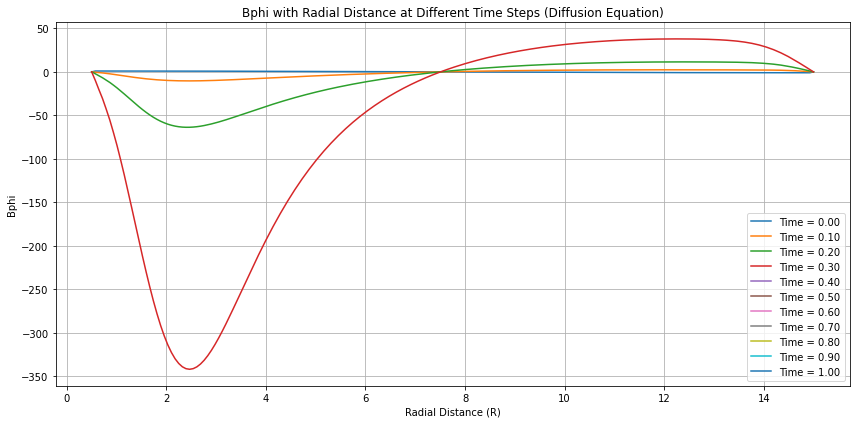

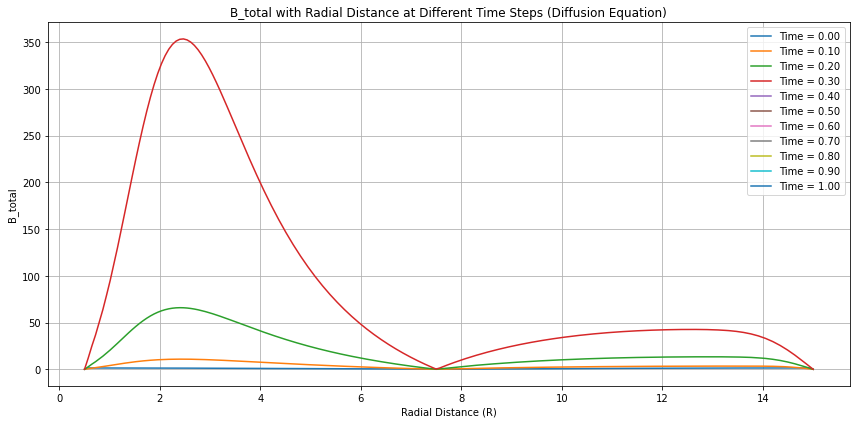

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
eta_t = 1 # Increased turbulent magnetic diffusivity
np.random.seed(42)
# Radial grid
R_max = 15 # Maximum radial distance(in kpc)
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
T = 1# Increased total time
Nt = 10000# Increased number of time steps
dt = T / Nt
h=0.5
# Initialize magnetic field B (considering only the radial component) with a larger seed field
R = np.linspace(0.5, R_max, Nr)
Br = np.cos((np.pi * R)/R_max)
Bphi = np.cos(np.pi * R / R_max)
#Br = np.exp(-R/R_max)
#Br = np.random.rand(Nr)
# Function to compute the radial Laplacian of B
def compute_laplacian_Br(R,Br,Bphi):
    omega0 = 250
    r_omega = 2
    omega = omega0/(1+(R/r_omega)**2)**0.5
    alpha_0 = (omega*(0.1)**2)/h
    B_eq = 10**10
    alpha = alpha_0/(1+(Br/B_eq)**2)
    return eta_t*(np.gradient((1/R)*np.gradient(R*Br, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) -(2*alpha*Bphi/np.pi)

def compute_laplacian_Bphi(R,Br,Bphi):
    omega0 = 250
    r_omega = 2
    omega = omega0/(1+(R/r_omega)**2)**0.5
    q = ((R/r_omega)**2) * (1+(R/r_omega)**2)**(-1)
    return eta_t*(np.gradient((1/R)*np.gradient(R*Bphi, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) - (q*omega*Br)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step(R,Br,Bphi, dt):
    k1_Br = dt * compute_laplacian_Br(R,Br,Bphi)
    k1_Bphi = dt * compute_laplacian_Bphi(R,Br,Bphi)

    k2_Br = dt * compute_laplacian_Br(R + 0.5*k1_Br,Br + 0.5 * k1_Br, Bphi + 0.5*k1_Br)
    k2_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k1_Bphi,Br + 0.5 * k1_Bphi, Bphi + 0.5*k1_Bphi)

    k3_Br = dt * compute_laplacian_Br(R + 0.5*k2_Br,Br + 0.5 * k2_Br, Bphi + 0.5*k2_Br)
    k3_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k2_Bphi,Br + 0.5 * k2_Bphi, Bphi + 0.5*k2_Bphi)

    k4_Br = dt * compute_laplacian_Br(R + k3_Br,Br + k3_Br, Bphi + k3_Br)
    k4_Bphi = dt * compute_laplacian_Br(R + k3_Bphi,Br + k3_Bphi, Bphi + k3_Bphi)

    new_Br = Br + (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6
    new_Bphi = Bphi + (k1_Bphi + 2 * k2_Bphi + 2 * k3_Bphi + k4_Bphi) / 6

    return new_Br, new_Bphi

# Store the evolution of magnetic field at different radial positions
evolution_Br = np.zeros((Nt + 1, Nr))
evolution_Bphi = np.zeros((Nt + 1, Nr))


# Time-stepping scheme using Runge-Kutta
# Time-stepping scheme using Runge-Kutta
for t in tqdm(range(Nt + 1)):
    # Apply boundary conditions at the inner boundary (R = 0)
    Br[0],Br[-1] = 0.0,0.0
    Bphi[0],Bphi[-1] = 0.0,0.0

    
    # Store the current magnetic field for visualization
    evolution_Br[t, :] = np.copy(Br)
    evolution_Bphi[t, :] = np.copy(Bphi)

    # Perform a Runge-Kutta step to update the magnetic field
    Br, Bphi = runge_kutta_step(R, Br, Bphi, dt)

 # Update Br and Bphi

# Plot the magnetic field components Br and Bphi with time at different radial positions
# Plot Br with respect to radial distance R at different time steps
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_Br[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Br')
plt.title('Br/Bphi with Radial Distance at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot Bphi with respect to radial distance R at different time steps
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_Bphi[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Bphi')
plt.title('Bphi with Radial Distance at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, np.sqrt((evolution_Br[t, :])**2+(evolution_Bphi[t, :])**2), label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('B_total')
plt.title('B_total with Radial Distance at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()





# Estimating critical dynamo number from the previous plot

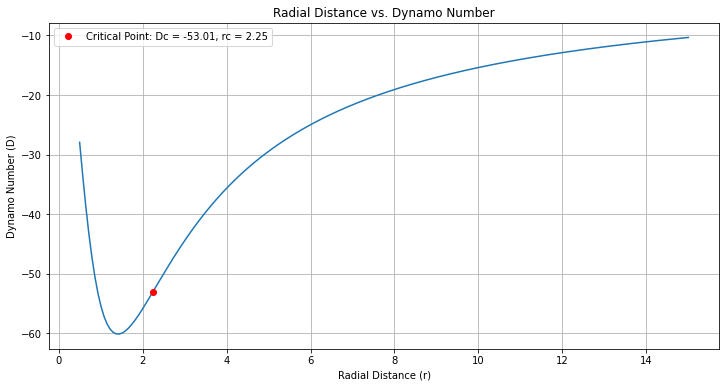

Critical Dynamo Number (D) where curvature changes from negative to positive: -53.006594917819214


In [201]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
omega_0 = 250
r_omega = 2
alpha_0 = (omega_0 * (0.1)**2) / h

# Initialize arrays to store r and D values
r_values = []
dynamo_values = []

# Calculate dynamo values for each radial distance
for i in range(len(R)):
    # Calculate omega_critical
    omega_critical = omega_0 / np.sqrt(1 + (R[i] / r_omega)**2)
    
    # Calculate D
    D = -alpha_0 * (R[i] / 1)**2 * (1 + (R[i] / 1)**2)**(-1) * (omega_0 / np.sqrt(1 + (R[i] / 1)**2)) * h**3 / (eta_t**2)
    
    # Append values to arrays
    r_values.append(R[i])
    dynamo_values.append(D)

# Convert to NumPy arrays
r_values = np.array(r_values)
dynamo_values = np.array(dynamo_values)

plt.figure(figsize=(12, 6))
# Plot r vs. D
plt.plot(r_values, dynamo_values)
plt.xlabel('Radial Distance (r)')
plt.ylabel('Dynamo Number (D)')
plt.title('Radial Distance vs. Dynamo Number')

# Find the index where the curvature changes sign
second_derivative = np.gradient(np.gradient(dynamo_values, r_values), r_values)
inflection_points = np.where(np.diff(np.sign(second_derivative)))[0]

# Find the D value where curvature changes from negative to positive
if len(inflection_points) > 0:
    critical_index = inflection_points[0]
    critical_D = dynamo_values[critical_index]
    critical_r = r_values[critical_index]
    plt.plot(critical_r, critical_D, 'ro', label=f'Critical Point: Dc = {critical_D:.2f}, rc = {critical_r:.2f}')
    plt.legend()
    plt.grid()
    plt.show()
    print("Critical Dynamo Number (D) where curvature changes from negative to positive:", critical_D)
else:
    print("No change in curvature from negative to positive detected.")


# Animation of the variation of field strength with radial distance

100%|██████████| 1001/1001 [00:00<00:00, 1932.66it/s]
MovieWriter imagemagick unavailable; using Pillow instead.


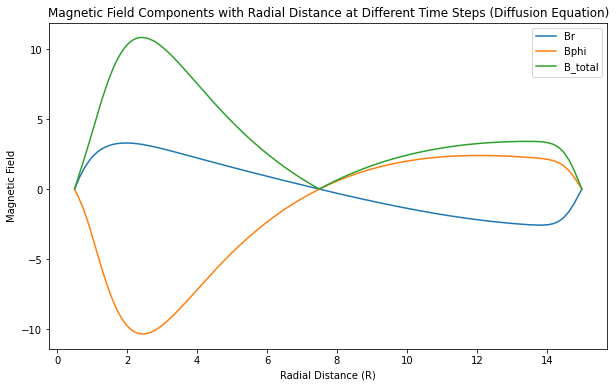

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tqdm import tqdm

# Parameters
eta_t = 1  # Increased turbulent magnetic diffusivity
np.random.seed(42)

# Radial grid
R_max = 15  # Maximum radial distance (in kpc)
Nr = 200   # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
T = 0.1  # Increased total time
Nt = 1000  # Increased number of time steps
dt = T / Nt
h = 0.5

# Initialize magnetic field B (considering only the radial component) with a larger seed field
R = np.linspace(0.5, R_max, Nr)
Br = np.cos((np.pi * R) / R_max)
Bphi = np.cos(np.pi * R / R_max)

# Function to compute the radial Laplacian of B
def compute_laplacian_Br(R, Br, Bphi):
    omega0 = 250
    r_omega = 2
    omega = omega0 / (1 + (R / r_omega) ** 2) ** 0.5
    alpha_0 = (omega * (0.1) ** 2) / h
    B_eq = 10 ** 10
    alpha = alpha_0 * (1 + (Br / B_eq) ** 2)
    return eta_t * (np.gradient((1 / R) * np.gradient(R * Br, dr), dr) + ((np.pi) ** 2) * Br / (4 * h ** 2)) - (2 * alpha * Bphi / np.pi)

def compute_laplacian_Bphi(R, Br, Bphi):
    omega0 = 250
    r_omega = 2
    omega = omega0 / (1 + (R / r_omega) ** 2) ** 0.5
    q = ((R / r_omega) ** 2) * (1 + (R / r_omega) ** 2) ** (-1)
    return eta_t * (np.gradient((1 / R) * np.gradient(R * Bphi, dr), dr) + ((np.pi) ** 2) * Br / (4 * h ** 2)) - (q * omega * Br)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step(R, Br, Bphi, dt):
    k1_Br = dt * compute_laplacian_Br(R, Br, Bphi)
    k1_Bphi = dt * compute_laplacian_Bphi(R, Br, Bphi)

    k2_Br = dt * compute_laplacian_Br(R + 0.5 * k1_Br, Br + 0.5 * k1_Br, Bphi + 0.5 * k1_Br)
    k2_Bphi = dt * compute_laplacian_Bphi(R + 0.5 * k1_Bphi, Br + 0.5 * k1_Bphi, Bphi + 0.5 * k1_Bphi)

    k3_Br = dt * compute_laplacian_Br(R + 0.5 * k2_Br, Br + 0.5 * k2_Br, Bphi + 0.5 * k2_Br)
    k3_Bphi = dt * compute_laplacian_Bphi(R + 0.5 * k2_Bphi, Br + 0.5 * k2_Bphi, Bphi + 0.5 * k2_Bphi)

    k4_Br = dt * compute_laplacian_Br(R + k3_Br, Br + k3_Br, Bphi + k3_Br)
    k4_Bphi = dt * compute_laplacian_Br(R + k3_Bphi, Br + k3_Bphi, Bphi + k3_Bphi)

    new_Br = Br + (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6
    new_Bphi = Bphi + (k1_Bphi + 2 * k2_Bphi + 2 * k3_Bphi + k4_Bphi) / 6

    return new_Br, new_Bphi

# Store the evolution of magnetic field at different radial positions
evolution_Br = np.zeros((Nt + 1, Nr))
evolution_Bphi = np.zeros((Nt + 1, Nr))
dynamo = []

# Time-stepping scheme using Runge-Kutta
for t in tqdm(range(Nt + 1)):
    # Apply boundary conditions at the inner boundary (R = 0)
    Br[0], Br[-1] = 0.0, 0.0
    Bphi[0], Bphi[-1] = 0.0, 0.0

    # Store the current magnetic field for visualization
    evolution_Br[t, :] = np.copy(Br)
    evolution_Bphi[t, :] = np.copy(Bphi)

    # Perform a Runge-Kutta step to update the magnetic field
    Br, Bphi = runge_kutta_step(R, Br, Bphi, dt)


fig, ax = plt.subplots(figsize=(10, 6))

def update(frame):
    ax.clear()
    ax.plot(R, evolution_Br[frame, :], label='Br')
    ax.plot(R, evolution_Bphi[frame, :], label='Bphi')
    ax.plot(R, np.sqrt((evolution_Br[frame, :]) ** 2 + (evolution_Bphi[frame, :]) ** 2), label='B_total')
    ax.set_xlabel('Radial Distance (R)')
    ax.set_ylabel('Magnetic Field')
    ax.set_title('Magnetic Field Components with Radial Distance at Different Time Steps (Diffusion Equation)')
    ax.legend()

animation = FuncAnimation(fig, update, frames=Nt+1, interval=20)
animation.save('field_strength.gif', writer='imagemagick')
# Display the animation
plt.show()


# Plot at 0.3 seconds here

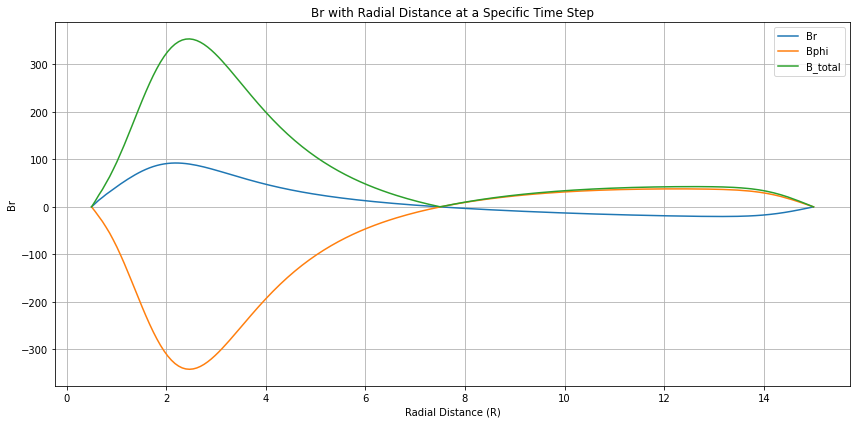

In [197]:
# Define the time step you're interested in
time_of_interest = 0.3  # Adjust this value to the specific time step you want to plot
time = np.linspace(0, T, Nt + 1)
# Find the index of the time step closest to the time of interest
time_index = np.argmin(np.abs(time - time_of_interest))

# Plot the magnetic field (Br or Bphi) at the specified time step
plt.figure(figsize=(12, 6))
plt.plot(R, evolution_Br[time_index],label='Br')  # Adjust for Br or Bphi accordingly
plt.plot(R, evolution_Bphi[time_index],label='Bphi')
plt.plot(R, np.sqrt((evolution_Br[time_index])**2+(evolution_Bphi[time_index])**2),label='B_total')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Br')  # Adjust for Bphi if needed
plt.title('Br with Radial Distance at a Specific Time Step')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# Plot of Pitch angle with radial distance

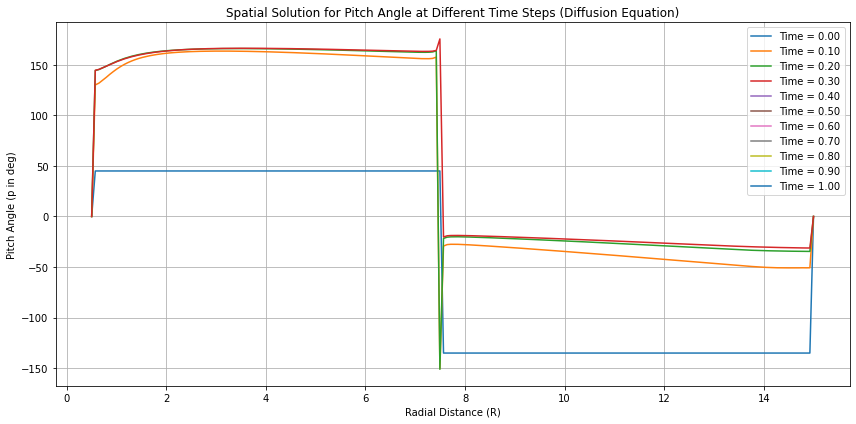

In [198]:
def compute_pitch_angle(Br, Bphi):
    return np.arctan2(Br,Bphi)

# Store the evolution of pitch angle at different time steps
evolution_pitch_angle = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    evolution_pitch_angle[t, :] = compute_pitch_angle(evolution_Br[t, :], evolution_Bphi[t, :])

# Plot the spatial solution for the pitch angle
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_pitch_angle[t, :]*180/np.pi, label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Pitch Angle (p in deg)')
plt.title('Spatial Solution for Pitch Angle at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# Plot with the time at different R

  0%|          | 0/10001 [00:00<?, ?it/s]

 35%|███▍      | 3469/10001 [00:01<00:03, 1750.45it/s]C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_3004\1673207594.py:28: RuntimeWarning: overflow encountered in square
  omega = omega0/(1+(R/r_omega)**2)**0.5
C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_3004\1673207594.py:31: RuntimeWarning: overflow encountered in square
  alpha = alpha_0/(1+(Br/B_eq)**2)
C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_3004\1673207594.py:32: RuntimeWarning: overflow encountered in multiply
  return eta_t*(np.gradient((1/R)*np.gradient(R*Br, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) -(2*alpha*Bphi/np.pi)
C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_3004\1673207594.py:32: RuntimeWarning: invalid value encountered in multiply
  return eta_t*(np.gradient((1/R)*np.gradient(R*Br, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) -(2*alpha*Bphi/np.pi)
C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_3004\1673207594.py:37: RuntimeWarning: overflow encountered in square
  omega = omeg

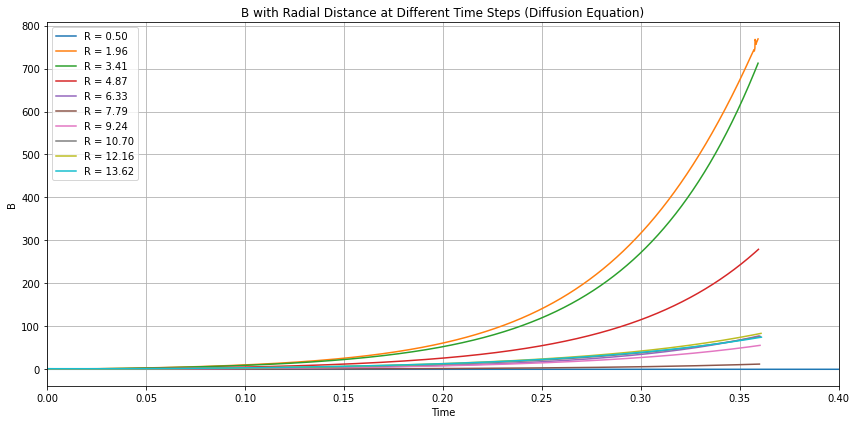

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
eta_t = 1 # Increased turbulent magnetic diffusivity
np.random.seed(42)
# Radial grid
R_max = 15 # Maximum radial distance(in kpc)
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
T = 1# Increased total time
Nt = 10000# Increased number of time steps
dt = T / Nt
h=0.5
# Initialize magnetic field B (considering only the radial component) with a larger seed field
R = np.linspace(0.5, R_max, Nr)
Br = np.cos((np.pi * R)/R_max)
Bphi = np.cos(np.pi * R / R_max)
#Br = np.exp(-R/R_max)
#Br = np.random.rand(Nr)
# Function to compute the radial Laplacian of B
def compute_laplacian_Br(R,Br,Bphi):
    omega0 = 250
    r_omega = 2
    omega = omega0/(1+(R/r_omega)**2)**0.5
    alpha_0 = (omega*(0.1)**2)/h
    B_eq = 10**10
    alpha = alpha_0/(1+(Br/B_eq)**2)
    return eta_t*(np.gradient((1/R)*np.gradient(R*Br, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) -(2*alpha*Bphi/np.pi)

def compute_laplacian_Bphi(R,Br,Bphi):
    omega0 = 250
    r_omega = 2
    omega = omega0/(1+(R/r_omega)**2)**0.5
    q = ((R/r_omega)**2) * (1+(R/r_omega)**2)**(-1)
    return eta_t*(np.gradient((1/R)*np.gradient(R*Bphi, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) - (q*omega*Br)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step(R,Br,Bphi, dt):
    k1_Br = dt * compute_laplacian_Br(R,Br,Bphi)
    k1_Bphi = dt * compute_laplacian_Bphi(R,Br,Bphi)

    k2_Br = dt * compute_laplacian_Br(R + 0.5*k1_Br,Br + 0.5 * k1_Br, Bphi + 0.5*k1_Br)
    k2_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k1_Bphi,Br + 0.5 * k1_Bphi, Bphi + 0.5*k1_Bphi)

    k3_Br = dt * compute_laplacian_Br(R + 0.5*k2_Br,Br + 0.5 * k2_Br, Bphi + 0.5*k2_Br)
    k3_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k2_Bphi,Br + 0.5 * k2_Bphi, Bphi + 0.5*k2_Bphi)

    k4_Br = dt * compute_laplacian_Br(R + k3_Br,Br + k3_Br, Bphi + k3_Br)
    k4_Bphi = dt * compute_laplacian_Br(R + k3_Bphi,Br + k3_Bphi, Bphi + k3_Bphi)

    new_Br = Br + (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6
    new_Bphi = Bphi + (k1_Bphi + 2 * k2_Bphi + 2 * k3_Bphi + k4_Bphi) / 6

    return new_Br, new_Bphi

# Store the evolution of magnetic field at different radial positions
evolution_Br = np.zeros((Nt + 1, Nr))
evolution_Bphi = np.zeros((Nt + 1, Nr))


# Time-stepping scheme using Runge-Kutta
# Time-stepping scheme using Runge-Kutta
for t in tqdm(range(Nt + 1)):
    # Apply boundary conditions at the inner boundary (R = 0)
    Br[0],Br[-1] = 0.0,0.0
    Bphi[0],Bphi[-1] = 0.0,0.0

    # Store the current magnetic field for visualization
    evolution_Br[t, :] = np.copy(Br)
    evolution_Bphi[t, :] = np.copy(Bphi)

    # Perform a Runge-Kutta step to update the magnetic field
    Br, Bphi = runge_kutta_step(R, Br, Bphi, dt)
    
 # Update Br and Bphi

plt.figure(figsize=(12, 6))
for i in range(0, Nr, Nr // 10):  # Plot every 10th radial position
    # Extracting Br and Bphi at the current radial position
    Br_at_R = evolution_Br[:, i]
    Bphi_at_R = evolution_Bphi[:, i]
    
    # Compute the magnitude of the magnetic field at the current radial position
    B_magnitude = np.sqrt(Br_at_R**2 + Bphi_at_R**2)
    
    
    
    # Plotting the magnitude of the magnetic field over time
    plt.plot(np.linspace(0, T, Nt + 1), B_magnitude, label=f'R = {R[i]:.2f}')
plt.xlabel('Time')
plt.ylabel('B')
plt.title('B with Radial Distance at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.xlim(0,0.4)
plt.grid()
plt.tight_layout()
plt.show()


# Getting the variation of Log(B) vs time to get growth rate

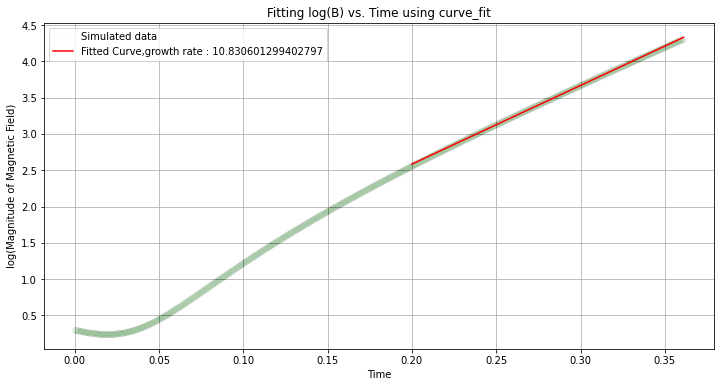

Optimized A: 1.5199512527549022
Optimized gamma: 10.830601299402797


In [204]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the model function: log(B) = log(A) + gamma * t
def model_function(t, log_A, gamma):
    return log_A + gamma * t

# Extracting time and magnitude of the magnetic field at a specific radial position
time = np.linspace(0, T, Nt + 1)  # Time
magnitude = B_magnitude  # Magnitude of the magnetic field (already computed)

# Compute log(B) for fitting
log_magnitude = np.log(magnitude)
valid_indices = np.isfinite(log_magnitude)
time_valid = time[valid_indices]
log_magnitude_valid = log_magnitude[valid_indices]
# Define the range of data points for fitting (adjust these values based on your observed plot)
fit_start = 2000
fit_end = 6000

# Extract the subset of data points for fitting
time_fit = time_valid[fit_start:fit_end]
log_magnitude_fit = log_magnitude_valid[fit_start:fit_end]

# Fit the data using curve_fit
popt, pcov = curve_fit(model_function, time_fit, log_magnitude_fit)

# Extract the optimized parameters
log_A_opt, gamma_opt = popt

# Calculate A from log_A
A_opt = np.exp(log_A_opt)

plt.figure(figsize=(12, 6))
# Plot the data and the fitted curve
plt.plot(time_valid, log_magnitude_valid, 'go', label='Simulated data',alpha=0.009)
plt.plot(time_fit, model_function(time_fit, *popt), 'r-', label=f'Fitted Curve,growth rate : {gamma_opt}',alpha=1)

plt.xlabel('Time')
plt.ylabel('log(Magnitude of Magnetic Field)')
plt.title('Fitting log(B) vs. Time using curve_fit')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimized parameters
print("Optimized A:", A_opt)
print("Optimized gamma:", gamma_opt)
